In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 4 + 3 * X[:, 0] - 2 * X[:, 1] + 1.5 * X[:, 2] + np.random.randn(100) * 0.5

In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # Regularization strength
ridge_model.fit(X_train, y_train)


Ridge()

In [11]:
# Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [13]:
# Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 0.29
Test MSE: 0.25


In [19]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values
alpha_values = [0.01, 0.1, 1, 10, 100]

# Set up the Ridge model with cross-validation
ridge_cv = GridSearchCV(
    estimator=Ridge(),
    param_grid={'alpha': alpha_values},
    scoring='neg_mean_squared_error',
    cv=5  # 5-fold cross-validation
)

ridge_cv.fit(X_train, y_train)

# Best alpha
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Best cross-validation score:", -ridge_cv.best_score_)

# Evaluate the model with the best alpha
best_ridge = ridge_cv.best_estimator_
test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))
print(f"Test MSE with best alpha: {test_mse:.2f}")


Best alpha: 0.01
Best cross-validation score: 0.35083019218471484
Test MSE with best alpha: 0.24


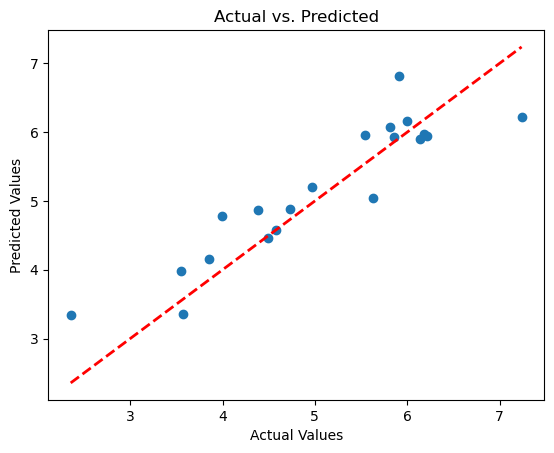

In [21]:
import matplotlib.pyplot as plt

# Predictions
y_pred = best_ridge.predict(X_test)

# Plot
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


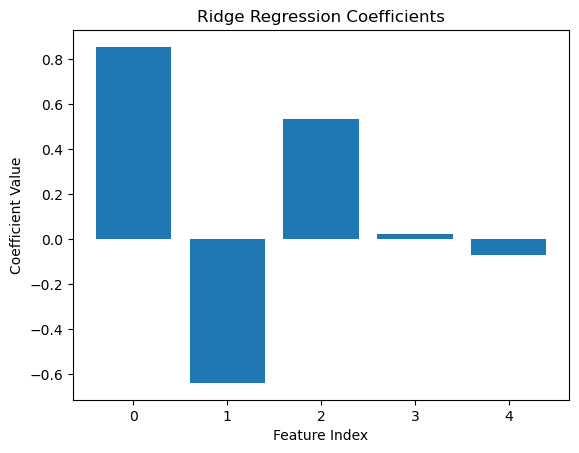

In [23]:
# Visualize the coefficients
coefficients = best_ridge.coef_
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients")
plt.show()


In [25]:

from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge model on polynomial features
ridge_poly = Ridge(alpha=best_ridge.alpha)
ridge_poly.fit(X_train_poly, y_train)

# Evaluate
test_mse_poly = mean_squared_error(y_test, ridge_poly.predict(X_test_poly))
print(f"Test MSE with polynomial features: {test_mse_poly:.2f}")


Test MSE with polynomial features: 0.29


In [27]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_test_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
print(f"Lasso Test MSE: {lasso_test_mse:.2f}")


Lasso Test MSE: 0.27


In [29]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
elastic_test_mse = mean_squared_error(y_test, elastic_model.predict(X_test))
print(f"ElasticNet Test MSE: {elastic_test_mse:.2f}")


ElasticNet Test MSE: 0.26
